In [1]:
import pandas as pd

In [7]:
df = pd.read_csv(r'C:\Users\91600\Downloads\mock_trades.csv')

In [18]:
df.head()

,Date,Stock,Type,Quantity,Price
0,2025-07-15,HDFC,Sell,47,1056.30
1,2025-07-02,TATA,Buy,43,2349.06
2,2025-07-12,RELIANCE,Sell,30,1884.86
3,2025-07-09,TATA,Sell,19,1764.31
4,2025-07-14,INFY,Buy,37,2198.51


### Data Cleaning

#### Check if there is any null value


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      50 non-null     object 
 1   Stock     50 non-null     object 
 2   Type      50 non-null     object 
 3   Quantity  50 non-null     int64  
 4   Price     50 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


### Add Total Price column

In [21]:
df['Total Price'] = df['Quantity'] * df['Price']
df.head()

,Date,Stock,Type,Quantity,Price,Total Price
0,2025-07-15,HDFC,Sell,47,1056.30,49646.10
1,2025-07-02,TATA,Buy,43,2349.06,101009.58
2,2025-07-12,RELIANCE,Sell,30,1884.86,56545.80
3,2025-07-09,TATA,Sell,19,1764.31,33521.89
4,2025-07-14,INFY,Buy,37,2198.51,81344.87


In [23]:
df.dtypes

Date            object
Stock           object
Type            object
Quantity         int64
Price          float64
Total Price    float64
dtype: object

### Convert Dates Datatype in Correct datatype

In [28]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.dtypes

Date           datetime64[ns]
Stock                  object
Type                   object
Quantity                int64
Price                 float64
Total Price           float64
dtype: object

In [32]:
df.head()

,Date,Stock,Type,Quantity,Price,Total Price
0,2025-07-15,HDFC,Sell,47,1056.30,49646.10
1,2025-07-02,TATA,Buy,43,2349.06,101009.58
2,2025-07-12,RELIANCE,Sell,30,1884.86,56545.80
3,2025-07-09,TATA,Sell,19,1764.31,33521.89
4,2025-07-14,INFY,Buy,37,2198.51,81344.87


## Data Analysis

### Highest Price of Stock Sell

In [50]:
Stock_sell = df[df['Type'] == 'Sell']
Stock_sell.head()

,Date,Stock,Type,Quantity,Price,Total Price
0,2025-07-15,HDFC,Sell,47,1056.30,49646.10
2,2025-07-12,RELIANCE,Sell,30,1884.86,56545.80
3,2025-07-09,TATA,Sell,19,1764.31,33521.89
5,2025-07-11,TATA,Sell,7,1516.74,10617.18
7,2025-07-04,HDFC,Sell,25,677.16,16929.00


In [52]:
results = Stock_sell.groupby('Stock')['Total Price'].sum()
results

Stock
HDFC         87487.80
INFY        146825.42
ITC          54951.16
RELIANCE    326309.68
TATA         97382.31
Name: Total Price, dtype: float64

In [54]:
import matplotlib.pyplot as plt

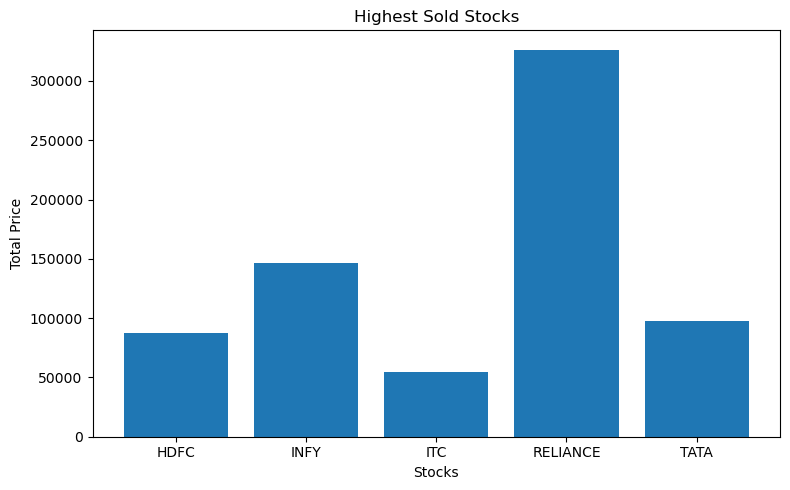

In [61]:
plt.figure(figsize=(8, 5))
plt.bar(results.index, results.values)
plt.xlabel('Stocks')
plt.ylabel('Total Price')
plt.title('Highest Sold Stocks')
plt.xticks(results.index)
plt.tight_layout()
plt.show()

### Which Stock in highly purhcased


In [63]:
Stock_purchased = df[df['Type'] == 'Buy']
Stock_purchased.head()

,Date,Stock,Type,Quantity,Price,Total Price
1,2025-07-02,TATA,Buy,43,2349.06,101009.58
4,2025-07-14,INFY,Buy,37,2198.51,81344.87
6,2025-07-14,INFY,Buy,34,2393.94,81393.96
8,2025-07-13,INFY,Buy,6,1602.85,9617.10
9,2025-07-15,TATA,Buy,15,2369.77,35546.55


In [65]:
results = Stock_purchased.groupby('Stock')['Total Price'].sum()
results

Stock
HDFC        124397.00
INFY        451416.30
ITC          14489.94
RELIANCE    134423.62
TATA        400660.53
Name: Total Price, dtype: float64

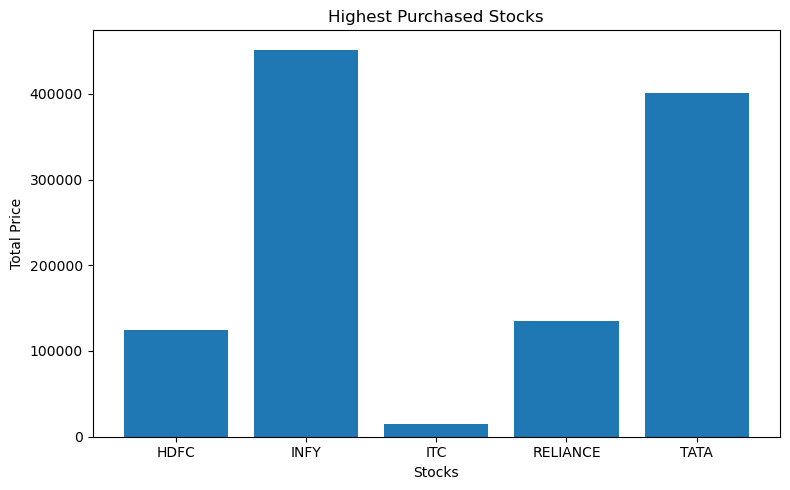

In [67]:
plt.figure(figsize=(8, 5))
plt.bar(results.index, results.values)
plt.xlabel('Stocks')
plt.ylabel('Total Price')
plt.title('Highest Purchased Stocks')
plt.xticks(results.index)
plt.tight_layout()
plt.show()

### The Stocks are more Purchased or Sold ?

In [82]:
results = df.groupby('Type')['Quantity'].sum()
results

Type
Buy     669
Sell    506
Name: Quantity, dtype: int64

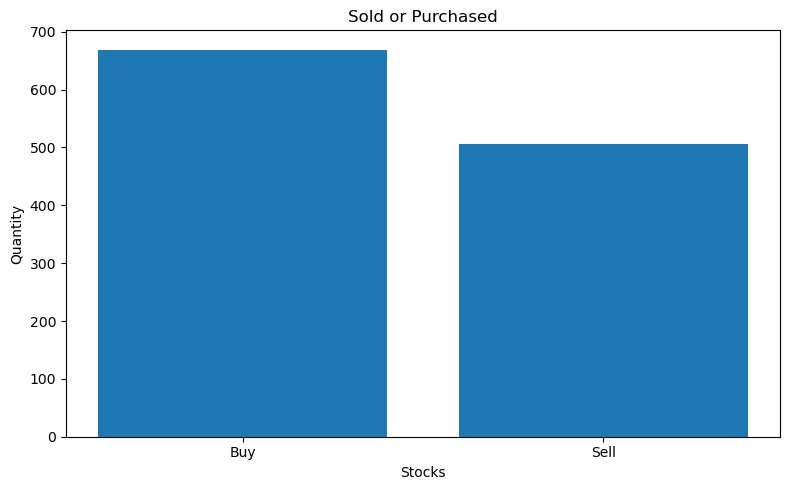

In [86]:
plt.figure(figsize=(8, 5))
plt.bar(results.index, results.values)
plt.xlabel('Stocks')
plt.ylabel('Quantity')
plt.title('Sold or Purchased')
plt.xticks(results.index)
plt.tight_layout()
plt.show()